In [2]:
# see https://oeis.org/A005185

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def a(n, n1=1, n2=1):
  if n < 1:
    raise ValueError('Aha!')

  if n == 1:
    return n1

  if n == 2:
    return n2

  return a(n - a(n - 1, n1, n2), n1, n2) + a(n - a(n - 2, n1, n2), n1, n2)

In [8]:
def memoize_a(big_n, n1=1, n2=1):
  lst = np.zeros(big_n)
  lst[0] = n1
  lst[1] = n2
  for i in range(2, big_n, 1):
    first_index = int(i - lst[i - 1])
    second_index = int(i - lst[i - 2])
    lst[i] = lst[first_index] + lst[second_index]
  return lst

In [9]:
def do_test(hp, lst):
  n_fails = 0

  for i in range(2, len(lst), 1):  # start at index = 2
    if not hp(i, lst):
      n_fails += 1
      print('hypothesis fails at k = {}'.format(i))

  if n_fails == 0:
    print('Success!')
  else:
    print('Failed {} times'.format(n_fails))

In [11]:
def test_minus1(i, lst):
  return i - lst[i - 1] <= i * 0.6493506493  # 4, todo ceil, floor ?

In [13]:
def test_same(i, lst):
  return i - lst[i] <= i * 0.645  # todo ceil, floor ?

In [14]:
def test_ak(i, lst):
  return i >= lst[i]

In [15]:
x = 100000
big_test_data = memoize_a(x)

In [17]:
do_test(test_same, big_test_data)

hypothesis fails at k = 384
Failed 1 times


In [21]:
i = 384
xs = range(1, x, 1)
ys = [
  (i - big_test_data[i - 1]) / i
  for i in xs
]
ys_compare = i * 50.0 / 77.0

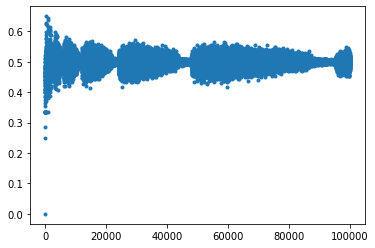

In [23]:
plt.plot(xs, ys, '.')
plt.show()